In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Prepare data

In [3]:
df = pd.read_csv("raw_data.csv")
print(df.shape)
df

(48, 2)


,bouncing rate (%),Week number
0,12.91645,1
1,13.03090,2
2,13.05717,3
3,13.16564,4
4,13.19299,5
5,12.72709,6
6,12.83613,7
7,12.75080,8
8,12.94173,9
9,13.00086,10


### Enrich the data


In [6]:
df["Intervention"] = df["Week number"].replace([range(1,25),range(25,49)],[0,1])

In [8]:
df["Intervention week"] = df["Week number"].replace([range(1,25),range(25,49)],[0,range(1,25)])

In [9]:
df.head()

,bouncing rate (%),Week number,Intervention,Intervention week
0,12.91645,1,0,0
1,13.03090,2,0,0
2,13.05717,3,0,0
3,13.16564,4,0,0
4,13.19299,5,0,0


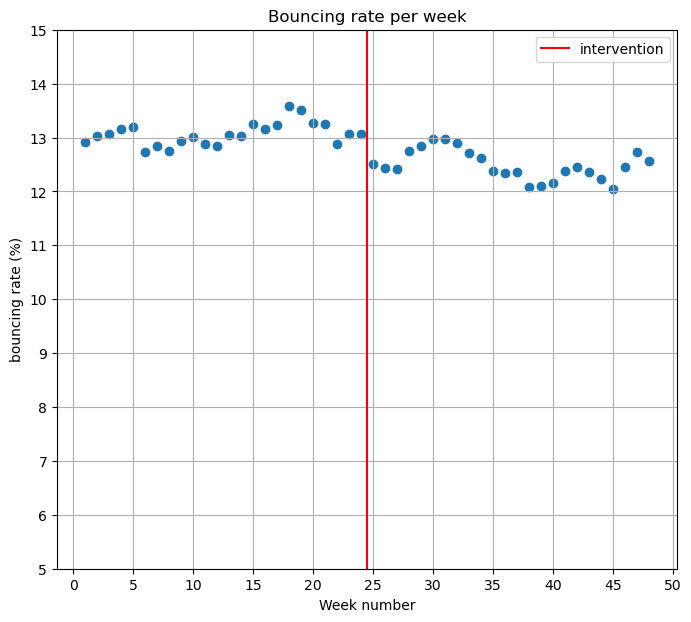

In [33]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(df["Week number"], df["bouncing rate (%)"])
ax.axvline(x = 24.5, color = 'r', label = 'intervention')
ax.grid(True)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])
plt.yticks(range(5,16))
plt.xlabel("Week number")
plt.ylabel("bouncing rate (%)")
plt.title("Bouncing rate per week")
plt.legend()
plt.show();

In [34]:
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

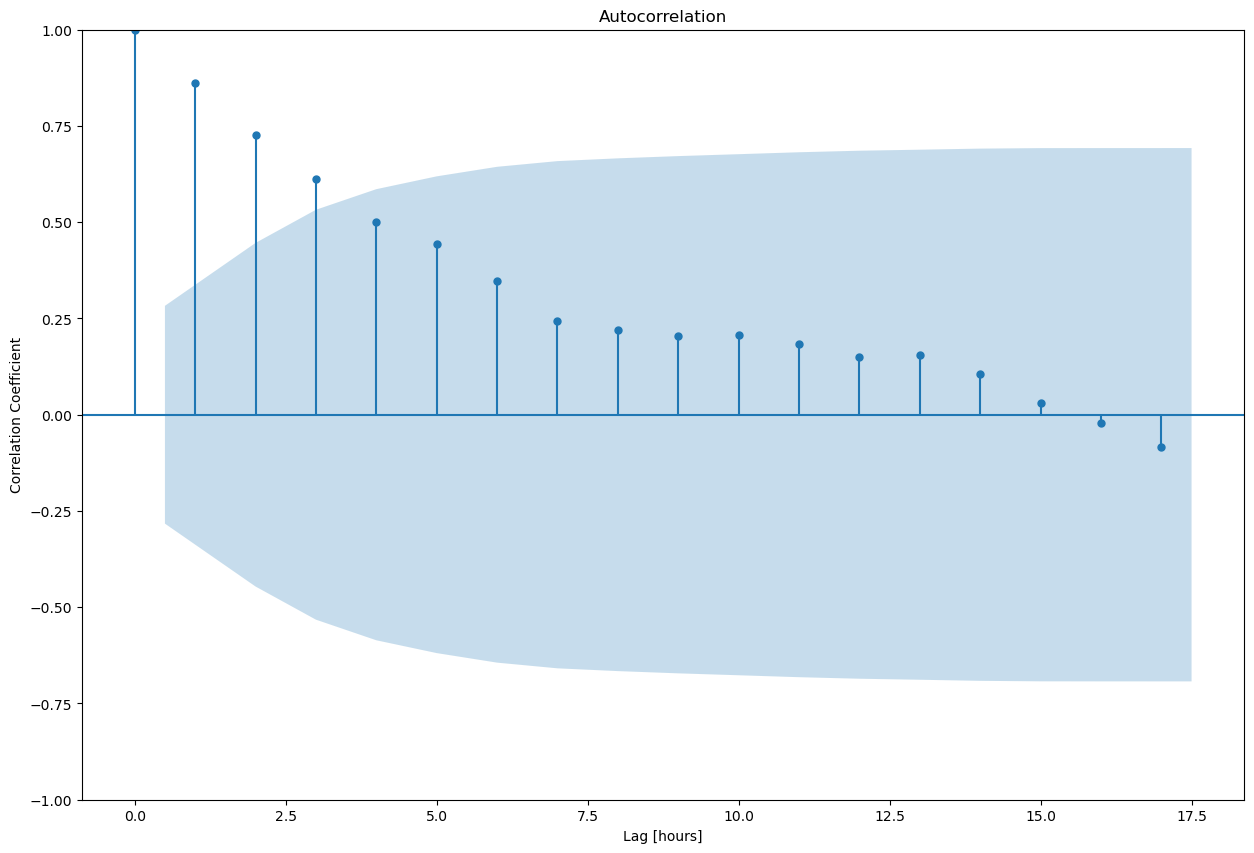

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_acf(df["bouncing rate (%)"],ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

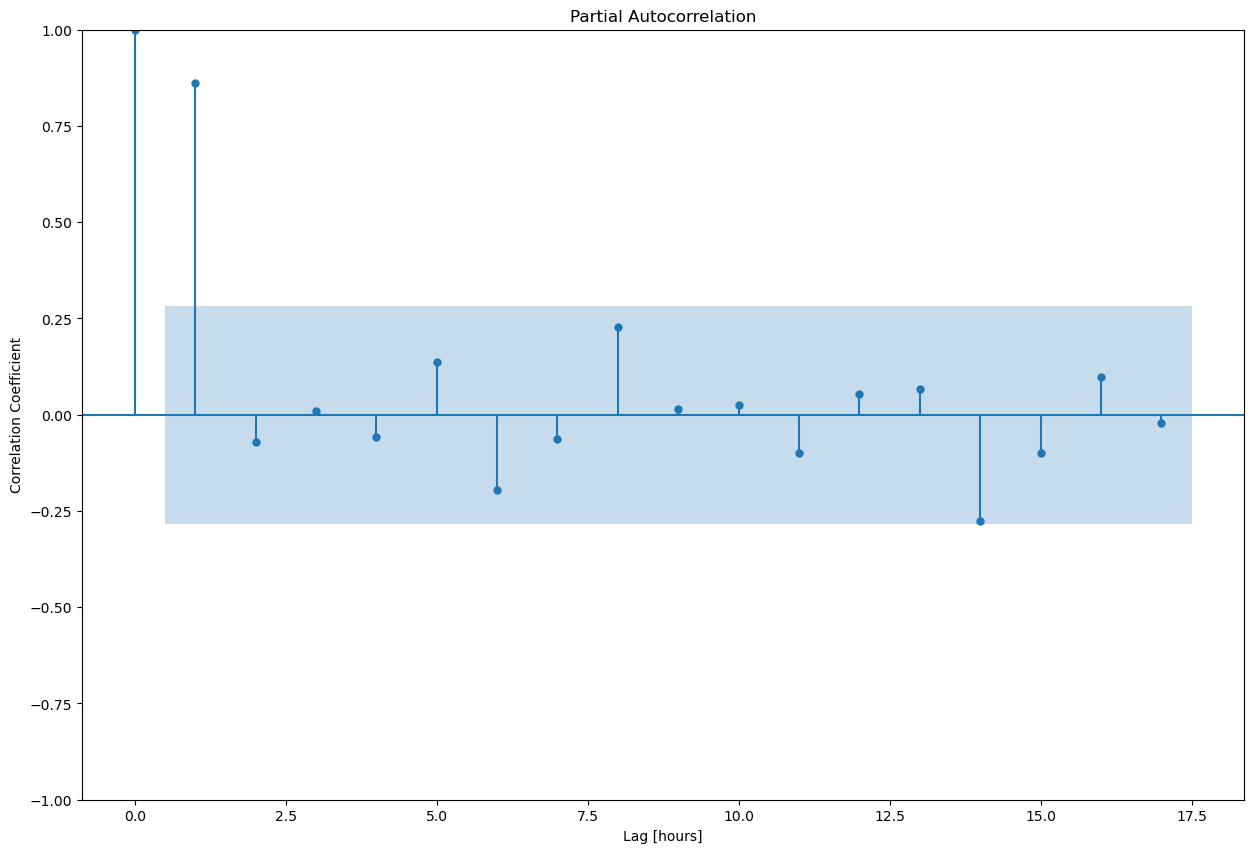

In [38]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_pacf(df["bouncing rate (%)"],ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
df.columns = ["Y","T","D","P"]
model = smf.ols(formula='Y ~ T + D + P', data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     29.18
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.52e-10
Time:                        14:00:32   Log-Likelihood:                 4.8860
No. Observations:                  48   AIC:                            -1.772
Df Residuals:                      44   BIC:                             5.713
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9100      0.096    134.225      0.0